In [2]:
import pandas as pd
df = pd.read_csv('Cleaned_flight_data.csv')

### Descriptive statistics

In [4]:
df.describe()

,Flight ID,Flight_Distance,Scheduled_Departure_Time,Day_of_Week,Month,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Dep_Hour,Dep_Minute
count,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0,3000.000000
mean,4.997429e+06,498.909333,11.435000,3.963000,6.381000,0.524023,26.793383,2.317439,0.515885,0.0,11.435000
std,2.868139e+06,98.892266,6.899298,2.016346,3.473979,0.290694,27.874733,1.430386,0.295634,0.0,6.899298
min,3.681000e+03,138.000000,0.000000,1.000000,1.000000,0.000965,0.000000,0.000103,0.001039,0.0,0.000000
25%,2.520313e+06,431.000000,6.000000,2.000000,3.000000,0.278011,7.000000,1.092902,0.265793,0.0,6.000000
50%,5.073096e+06,497.000000,12.000000,4.000000,6.000000,0.522180,18.000000,2.126614,0.517175,0.0,12.000000
75%,7.462026e+06,566.000000,17.000000,6.000000,9.000000,0.776323,38.000000,3.525746,0.770370,0.0,17.000000
max,9.999011e+06,864.000000,23.000000,7.000000,12.000000,1.099246,259.000000,5.189038,1.123559,0.0,23.000000


### Distributive data

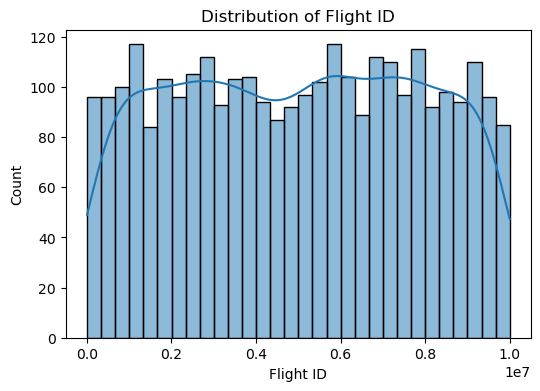

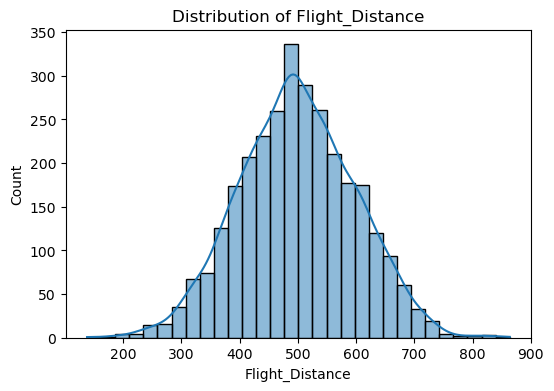

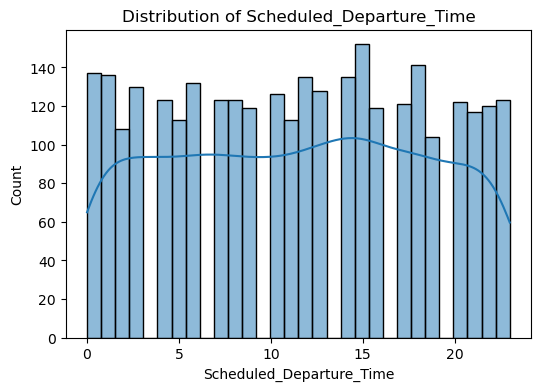

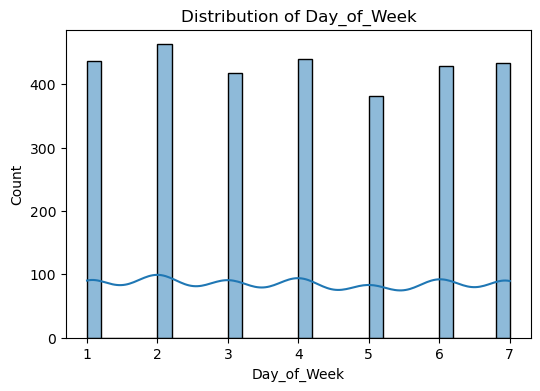

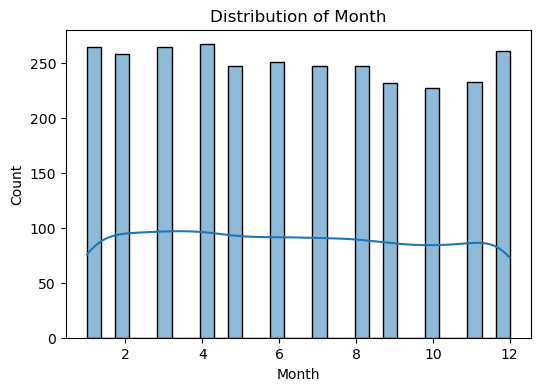

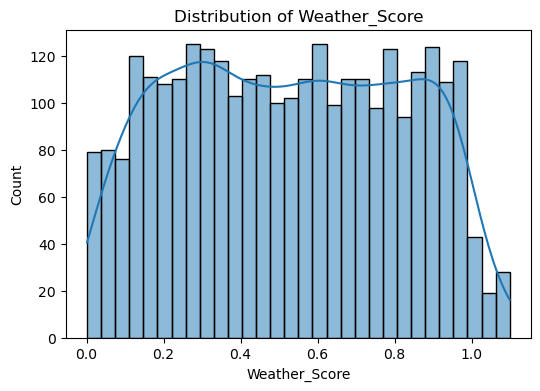

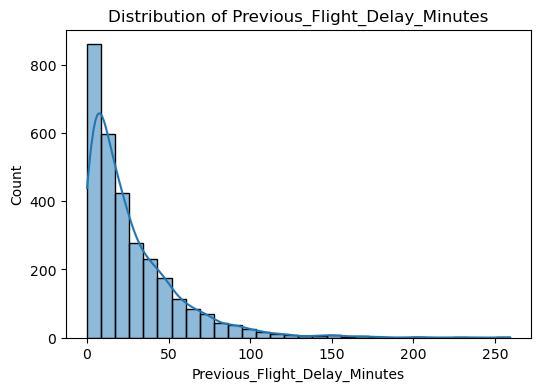

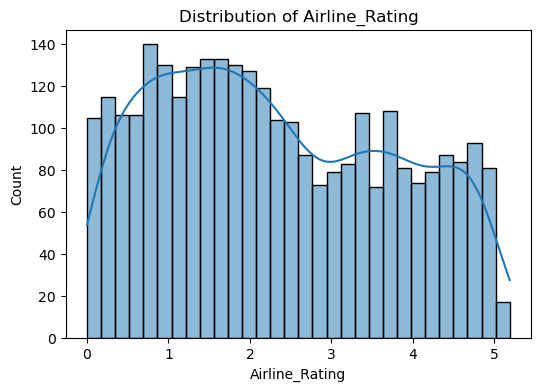

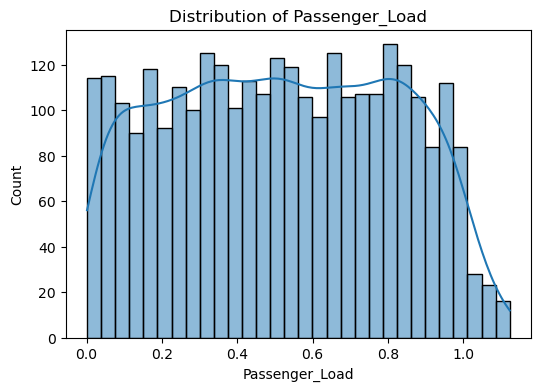

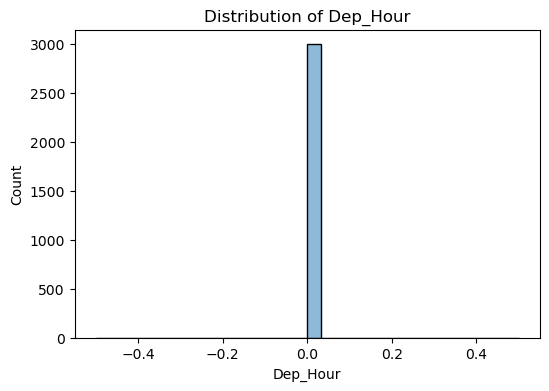

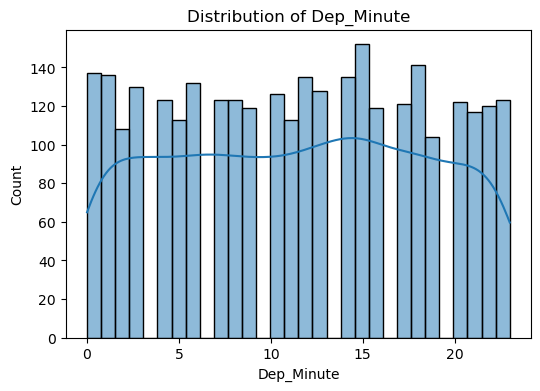

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


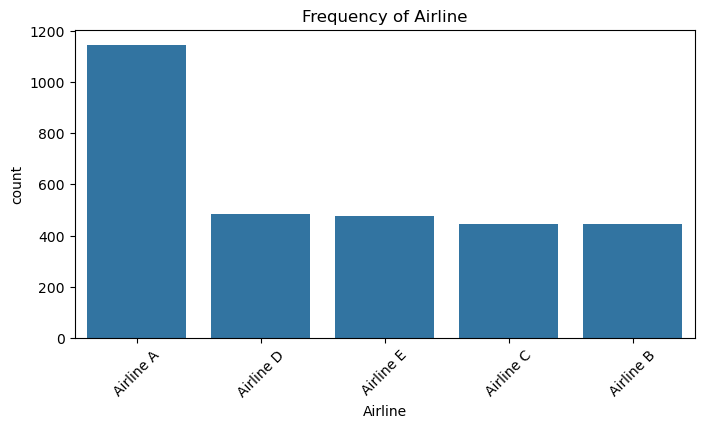

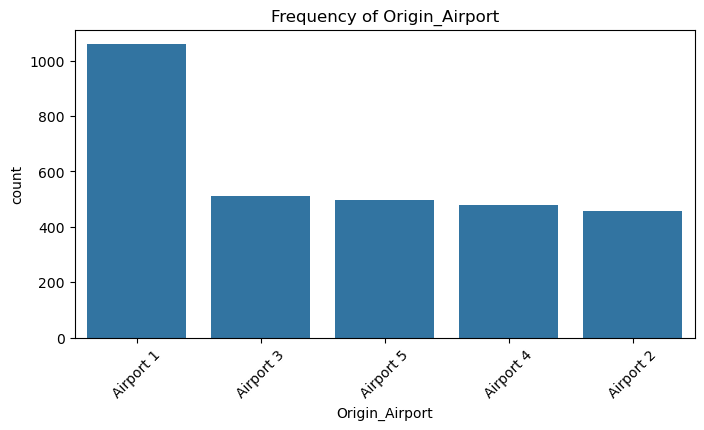

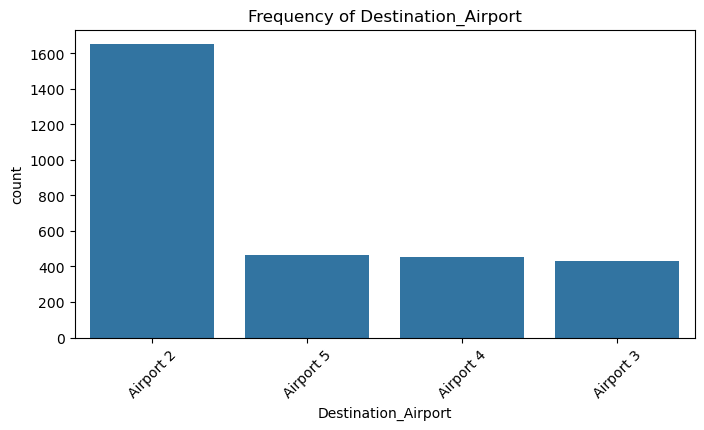

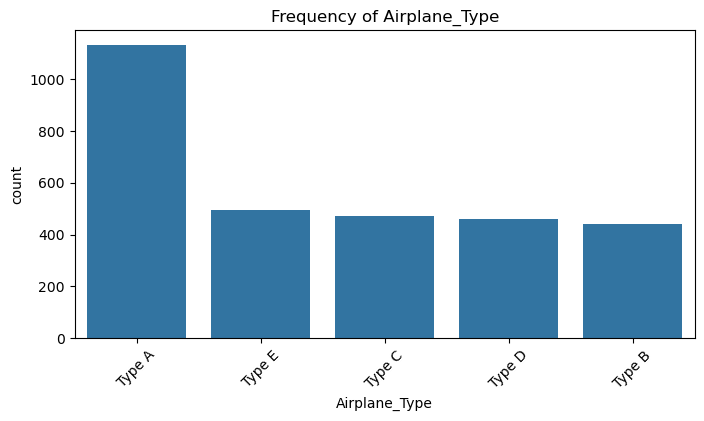

In [9]:
categorical_cols = ['Airline', 'Origin_Airport', 'Destination_Airport', 'Airplane_Type']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
    plt.show()


### Feature relationships

##### Corelation heatmap

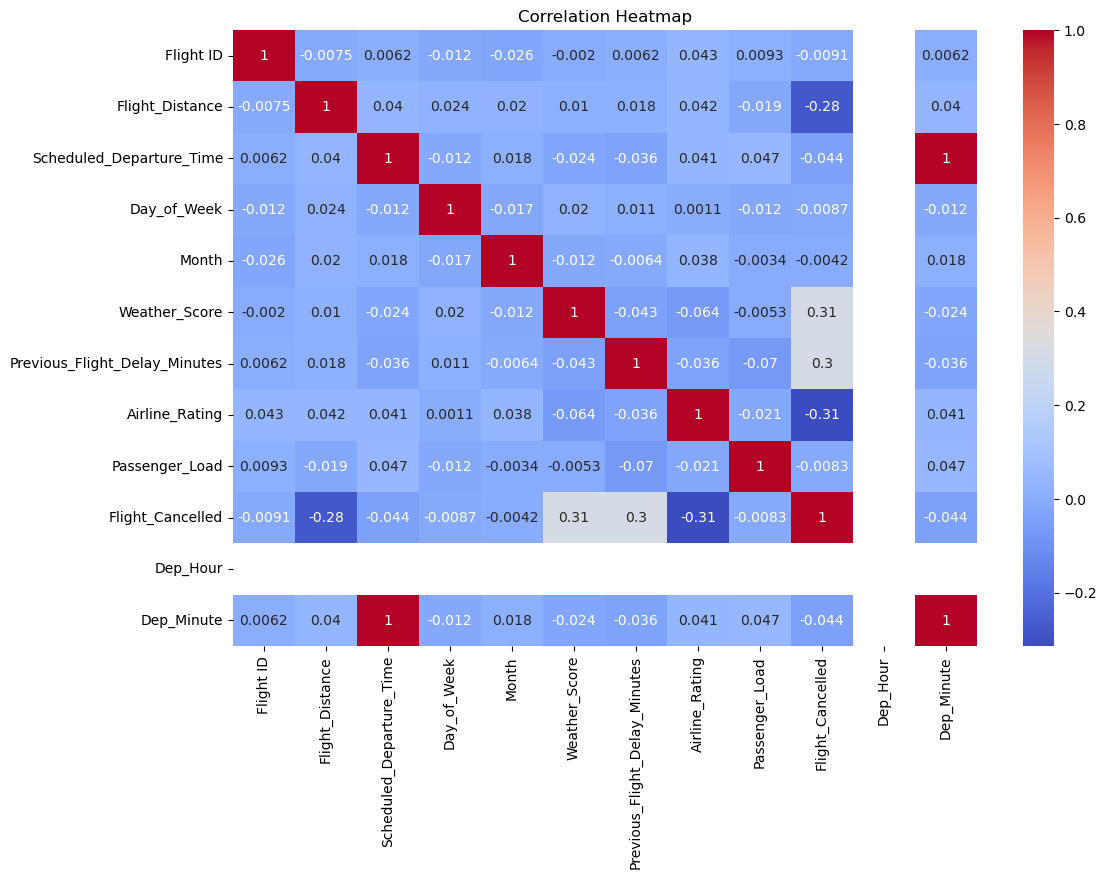

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


##### Pair plot

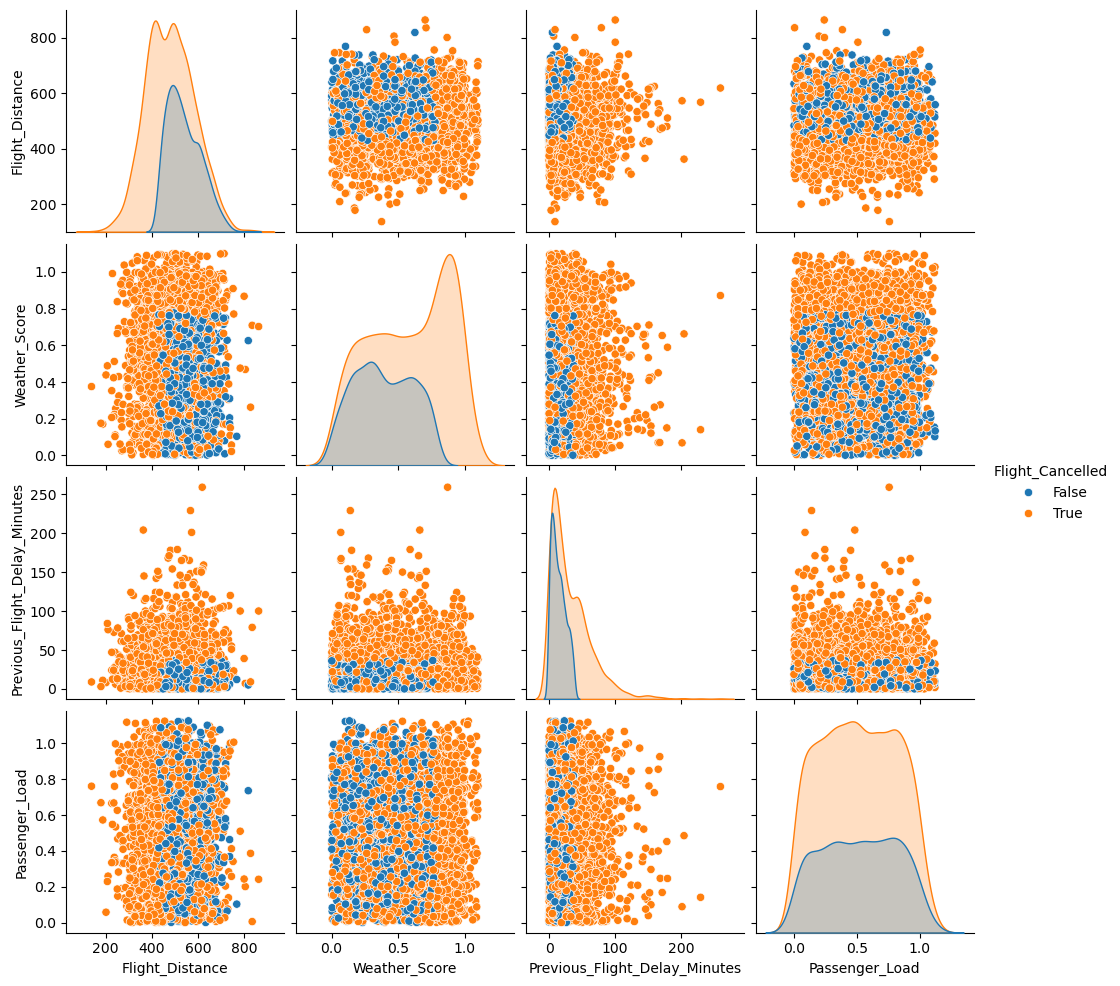

In [16]:
sns.pairplot(df[['Flight_Distance', 'Weather_Score', 'Previous_Flight_Delay_Minutes', 'Passenger_Load', 'Flight_Cancelled']], hue='Flight_Cancelled')
plt.show()


### Feature vs Target

##### Categorical features

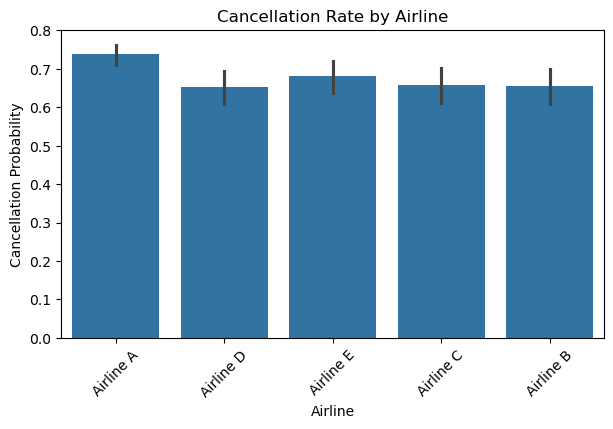

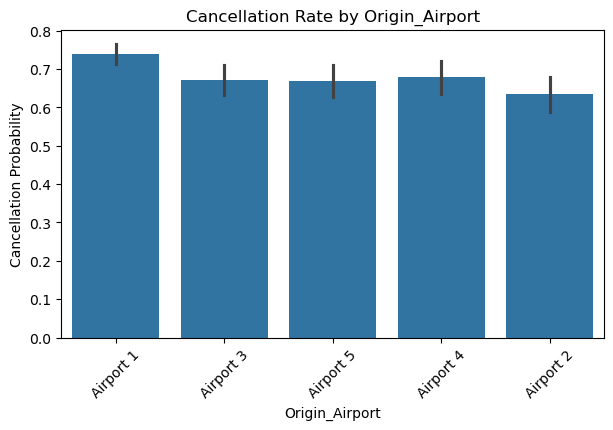

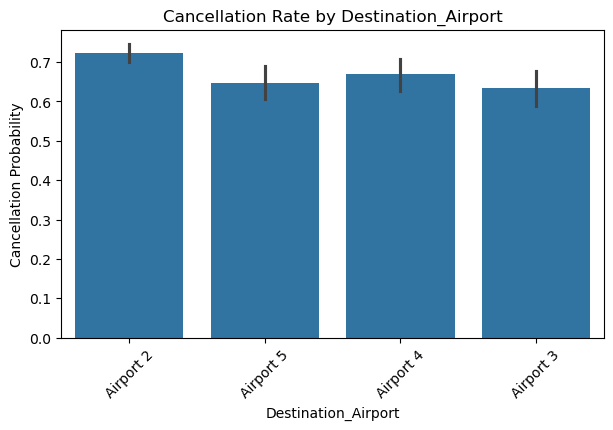

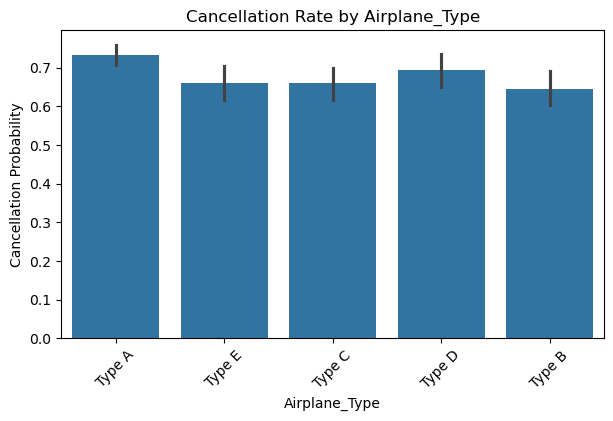

In [20]:
for col in categorical_cols:
    plt.figure(figsize=(7, 4))
    sns.barplot(data=df, x=col, y='Flight_Cancelled', estimator='mean', order=df[col].value_counts().index)
    plt.title(f'Cancellation Rate by {col}')
    plt.xticks(rotation=45)
    plt.ylabel('Cancellation Probability')
    plt.show()


##### Numerical features

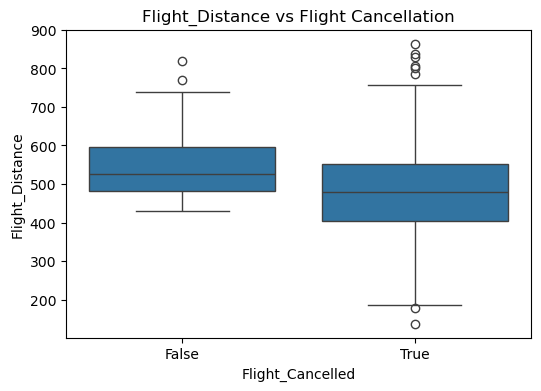

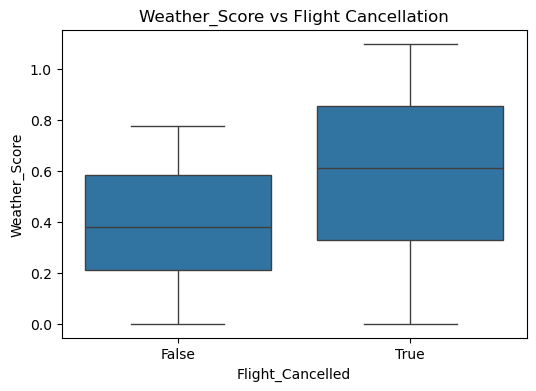

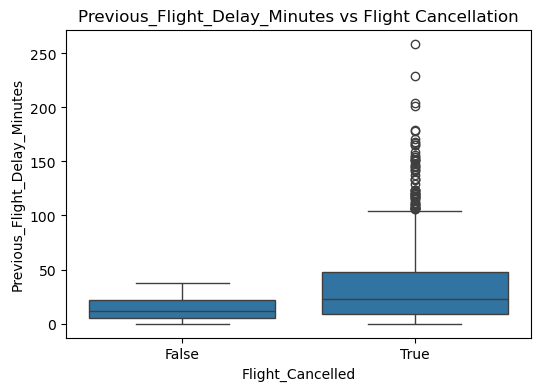

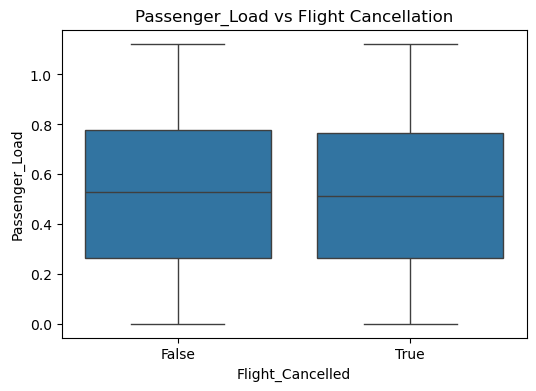

In [23]:
for col in ['Flight_Distance', 'Weather_Score', 'Previous_Flight_Delay_Minutes', 'Passenger_Load']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Flight_Cancelled', y=col)
    plt.title(f'{col} vs Flight Cancellation')
    plt.show()
